# Определить класс ириса

Определить класс ириса по длине и ширине чашелистиков и лепестков с помощью метода машинного обучения Support Vector Machines

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (18,12)

In [20]:
data_iris = pd.read_csv('IRIS.csv')

In [21]:
data_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
data_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 0.98, 'Relation between Sepal Width and Sepal Length')

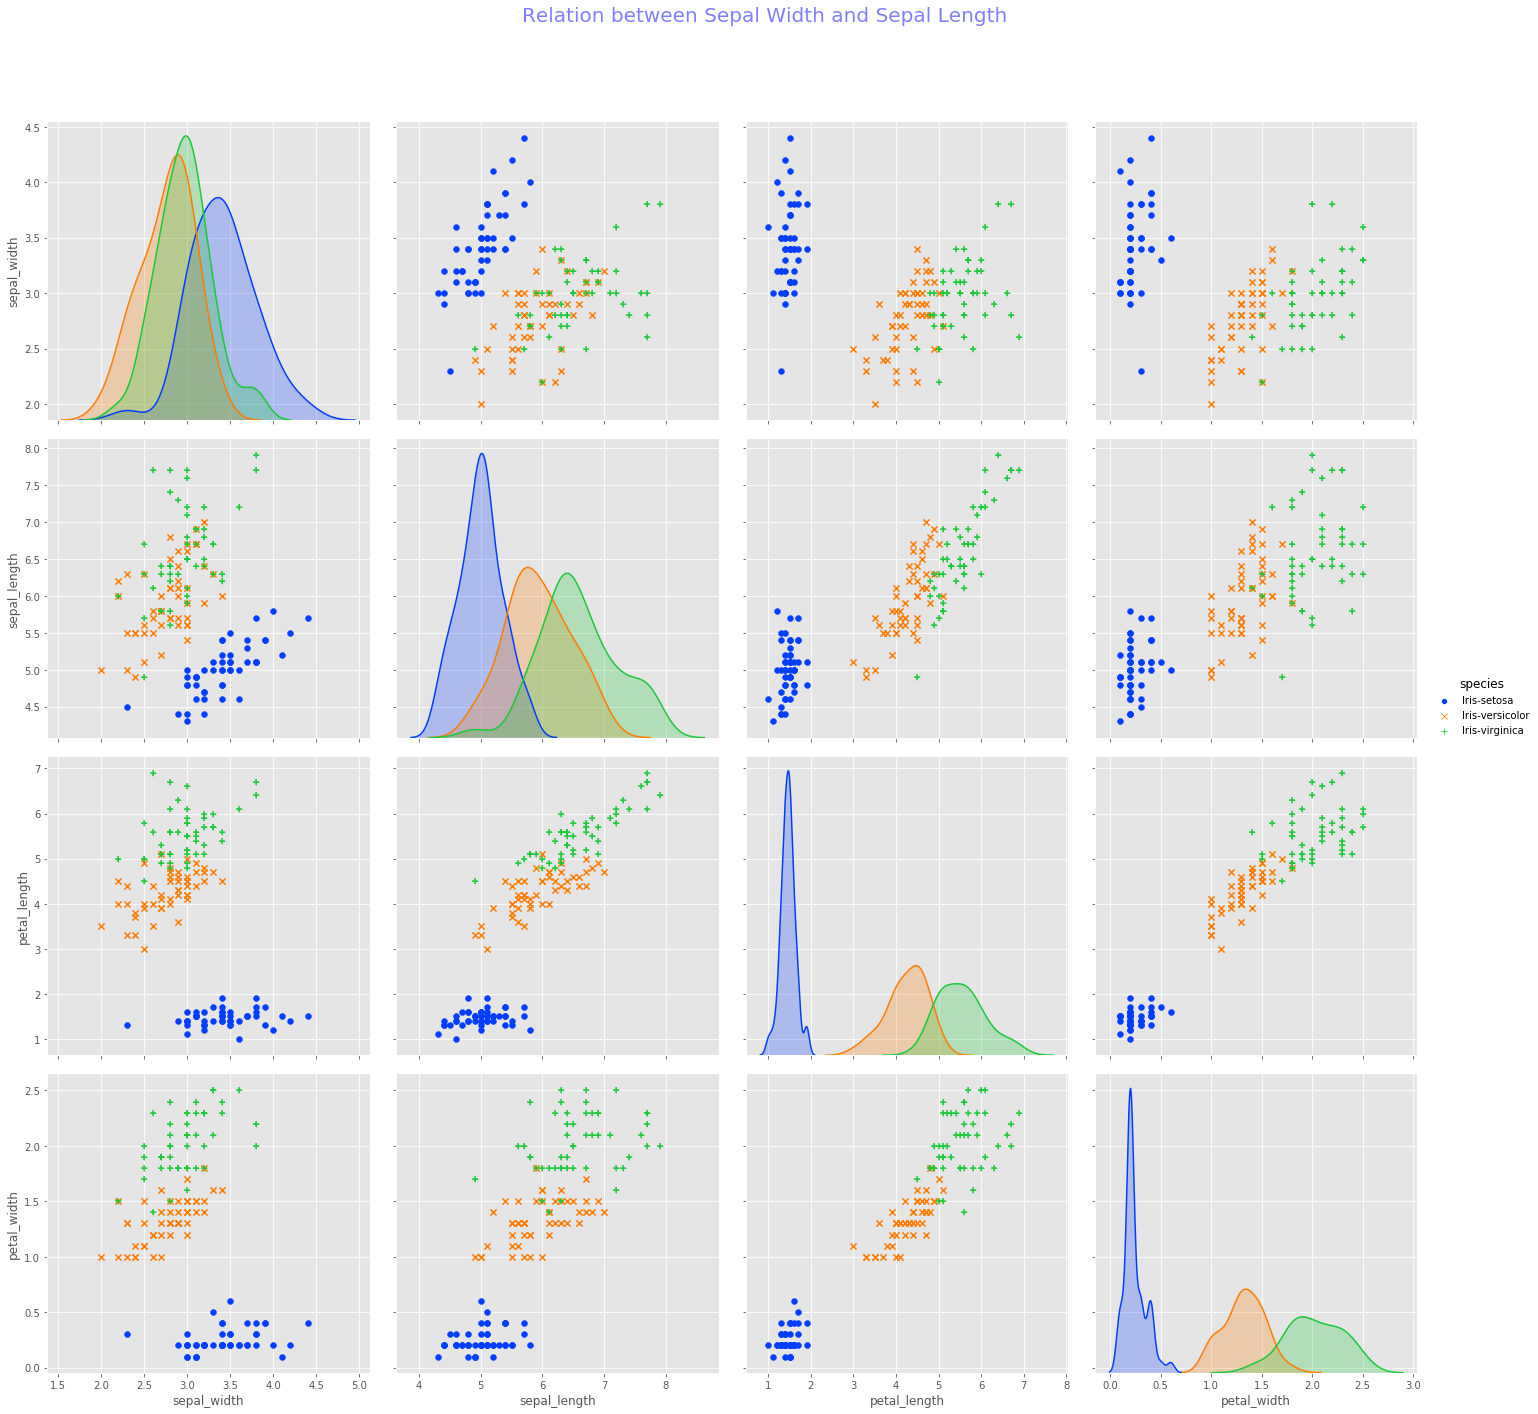

In [55]:
#create a pairplot(plot across different attributes)
#size decides the size of the graph
#palette decides the colour
a=sns.pairplot(data_iris,hue='species',palette="bright",size=5, vars=['sepal_width','sepal_length','petal_length','petal_width'],kind='scatter',markers=['o','x','+'])

#to change the size of scatterpoints
a=a.map_offdiag(plt.scatter, alpha=0.9)

#remove the top and the right lines
sns.despine()

#additional line to adjust some appearance issues
plt.subplots_adjust(top=0.9)

#set the title of the graph
a.fig.suptitle('Relation between Sepal Width and Sepal Length',fontsize=20,color='b',alpha=0.5)

In [31]:
print(data_iris)

     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
5             5.4          3.9           1.7          0.4     Iris-setosa
6             4.6          3.4           1.4          0.3     Iris-setosa
7             5.0          3.4           1.5          0.2     Iris-setosa
8             4.4          2.9           1.4          0.2     Iris-setosa
9             4.9          3.1           1.5          0.1     Iris-setosa
10            5.4          3.7           1.5          0.2     Iris-setosa
11            4.8          3.4           1.6          0.2     Iris-setosa
12            4.8          3.0        

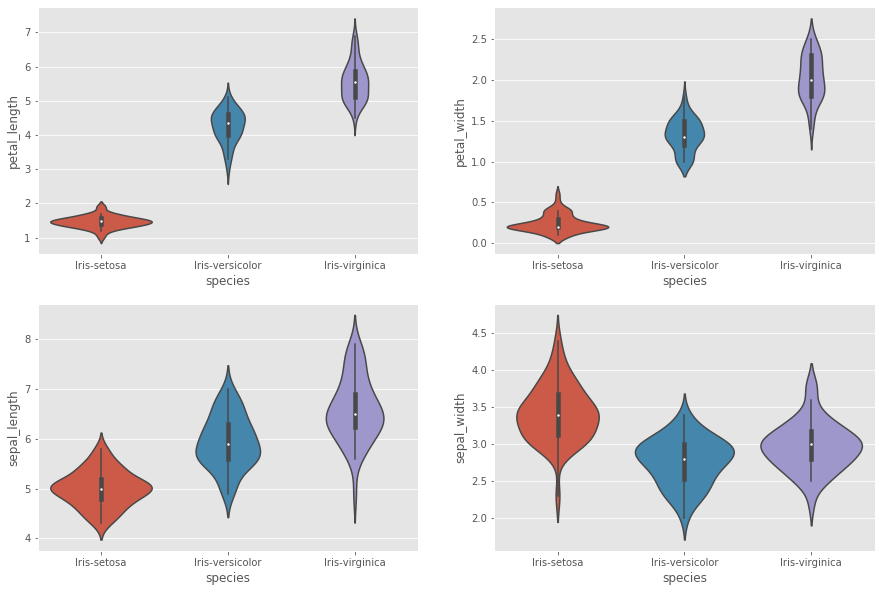

In [58]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='petal_length',data=data_iris)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='petal_width',data=data_iris)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='sepal_length',data=data_iris)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='sepal_width',data=data_iris)

In [32]:
features = data_iris[['sepal_length','sepal_width','petal_length','petal_width']]
label = data_iris['species']

In [33]:
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.33, random_state=123)

In [34]:
svm_classifier = SVC(gamma='auto')
svm_classifier.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [35]:
prediction = svm_classifier.predict(x_test)

In [36]:
print("The accuracy is : ", accuracy_score(y_test, prediction))

The accuracy is :  0.98


SVM предсказывает вид ириса с вероятностью 98%